# TITANIC EXPLORATORY DATA ANALYSIS

### An exploratory data analysis to understand the factors affecting survival rates

In [9]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Load the Titanic dataset
df = pd.read_csv('C:\\Users\\okead\\Downloads\\Titanic Dataset.csv')

In [12]:
# Display the first few rows of the dataframe to verify its contents
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [13]:
# Check for missing values and data types to clean the dataset
df.info()

# Display summary statistics to understand the data distribution
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    

C:\Users\okead\AppData\Local\Temp\ipykernel_12936\3459452412.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\okead\AppData\Local\Temp\ipykernel_12936\3459452412.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

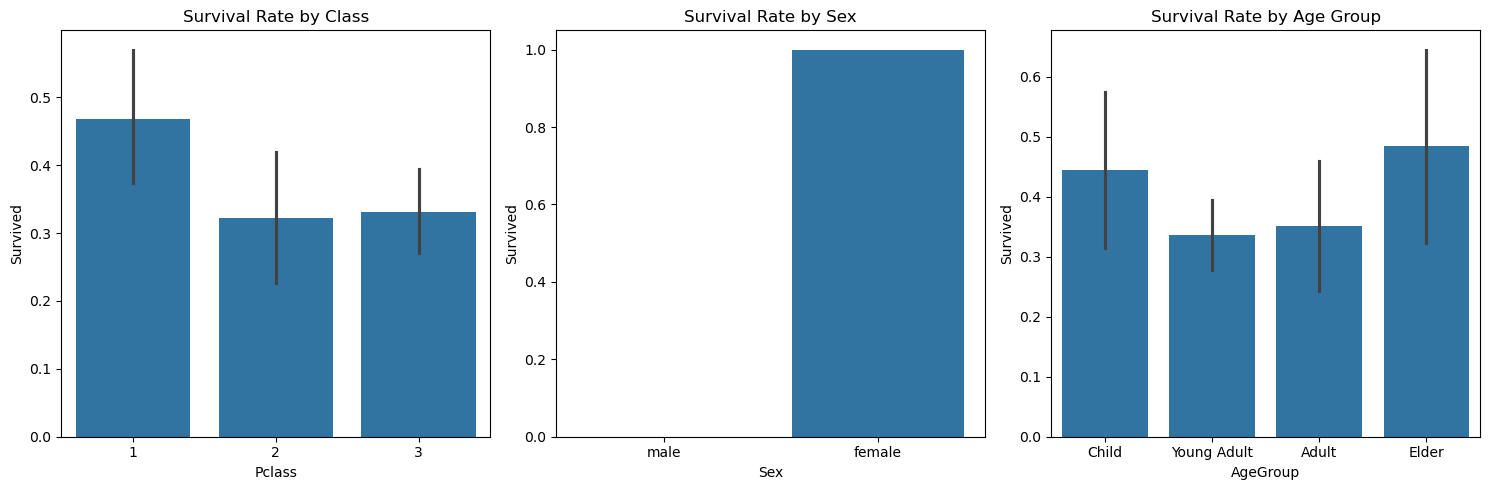

Survival Rates:
Overall Survival Rate: 36.36 %
Survival Rate by Class:
Pclass
1    46.7
2    32.3
3    33.0
Name: Survived, dtype: float64
Survival Rate by Sex:
Sex
female    100.0
male        0.0
Name: Survived, dtype: float64


In [14]:
# Clean the data
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Create survival rate visualizations
plt.figure(figsize=(15, 5))

# Survival by Class
plt.subplot(131)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')

# Survival by Sex
plt.subplot(132)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')

# Survival by Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Elder'])
plt.subplot(133)
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')

plt.tight_layout()
plt.show()

# Calculate survival rates by different factors
print("\
Survival Rates:")
print("Overall Survival Rate:", round(df['Survived'].mean() * 100, 2), "%")
print("\
Survival Rate by Class:")
print(df.groupby('Pclass')['Survived'].mean().round(3) * 100)
print("\
Survival Rate by Sex:")
print(df.groupby('Sex')['Survived'].mean().round(3) * 100)

### The analysis shows that survival rates on the Titanic were significantly influenced by passenger class, sex, and age group, with higher survival rates observed in first-class passengers, females, and younger age groups.

## Conclusion:

## Class: First-class passengers had a higher survival rate compared to second and third-class passengers.
## Sex: Females had a significantly higher survival rate than males.
## Age Group: Younger passengers, particularly children, had higher survival rates.
## Recommendation:

### In future scenarios involving limited resources, prioritizing vulnerable groups such as women and children could improve survival outcomes.
### Understanding the impact of socio-economic status (as indicated by class) on survival can inform better emergency preparedness and response strategies.